In [27]:
import pandas as pd
import seaborn as sns
import missingno as msno
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, f1_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [28]:
df = pd.read_excel('base_unificada.xlsx')

In [29]:
df.columns

Index(['data', 'ultimo_valor', 'valor_abertura', 'valor_maximo',
       'valor_minimo', 'volume', 'variacao', 'bmp_inv_carteira',
       'bmp_inv_direto', 'cpi_aucsl', 'cpi_variacao_12m', 'erp_t_bill_rate',
       'erp_t_bond_rate', 'erp_bond_bill', 'erp_implied_premium_ddm',
       'erp_implied_erp_fcfe', 'erp_riskfree_rate', 'ipca_indice_dez',
       'ipca_no_mes', 'ipca_12_meses', 'ke', 'ke_rf_10_y', 'ke_cpi', 'ke_ipca',
       'ke_premio_risco', 'ke_risco_pais', 'ke_selic_dia', 'indice_pib',
       'crescimento_pib'],
      dtype='object')

In [30]:
df.set_index('data', inplace=True)

<Axes: >

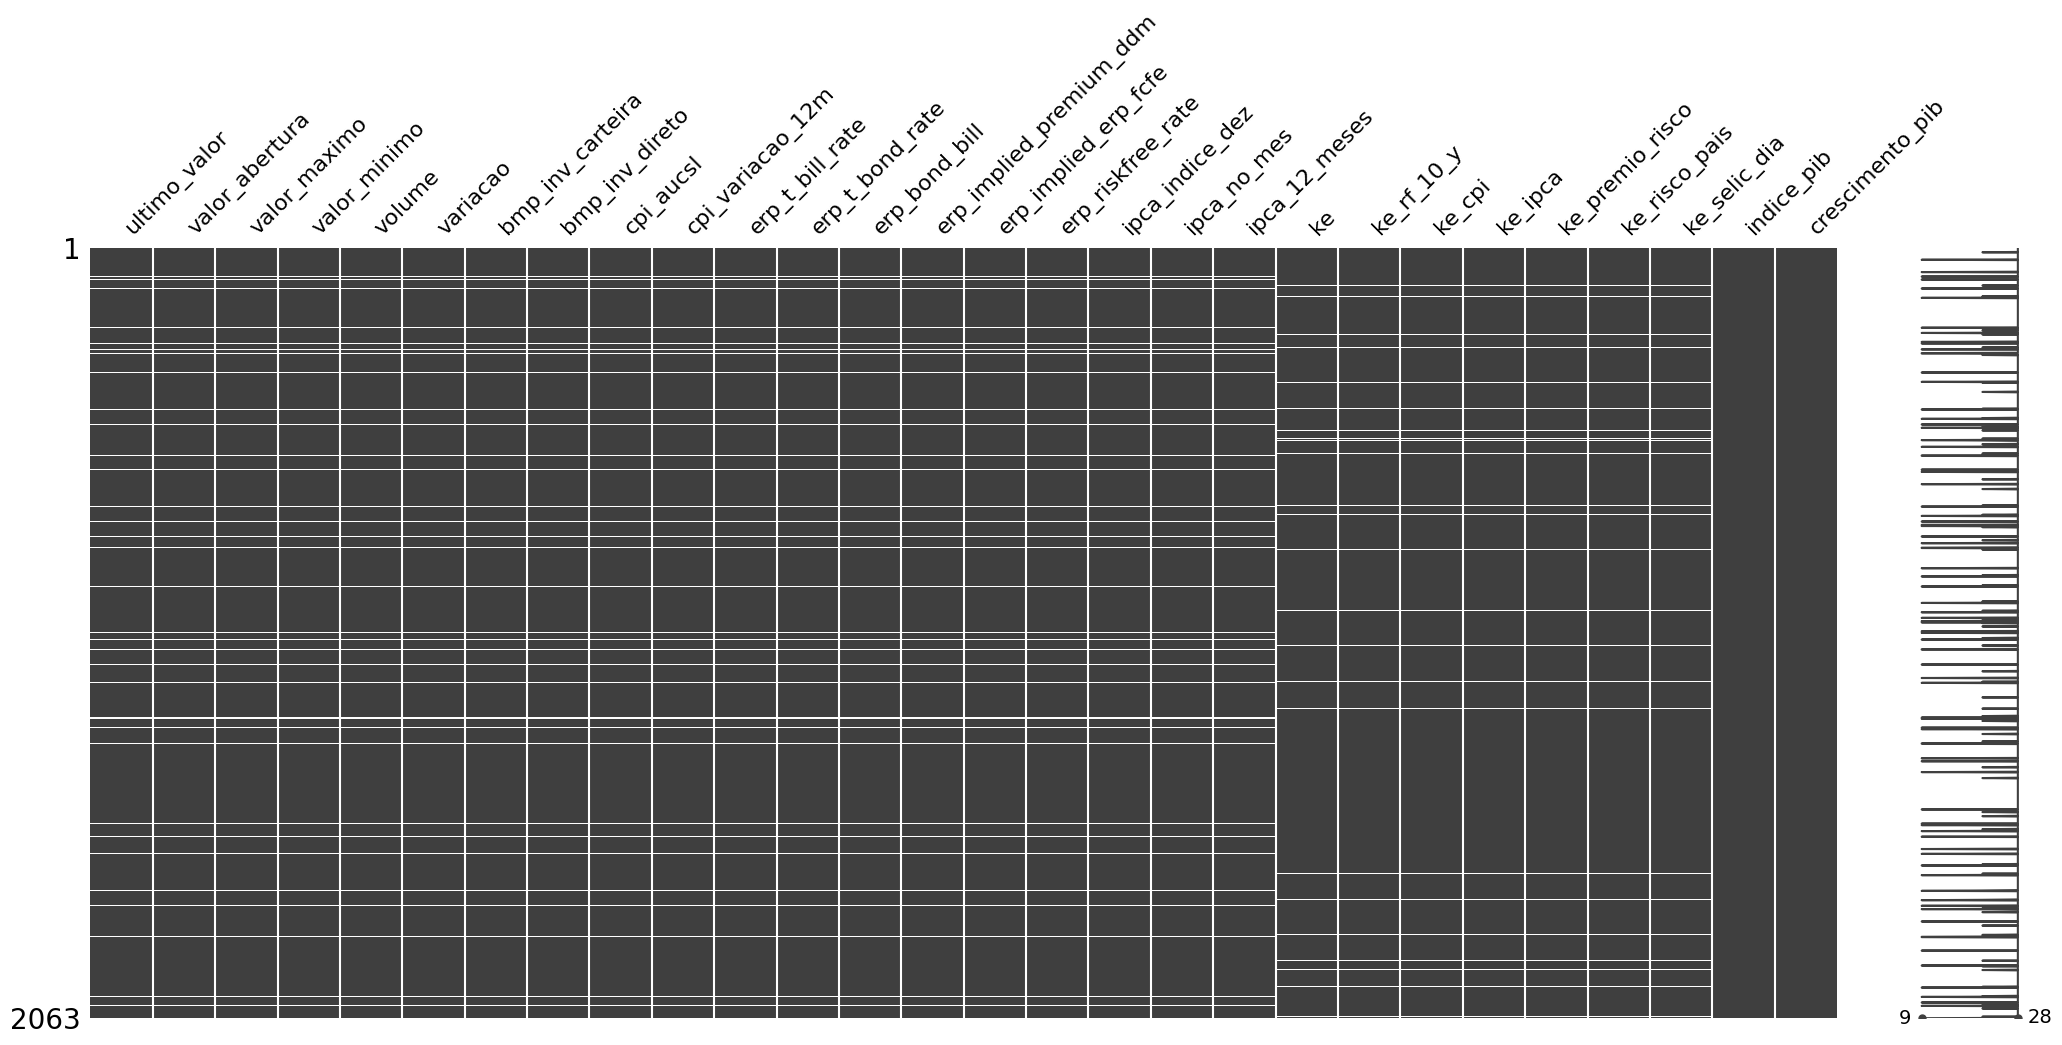

In [31]:
msno.matrix(df.loc['2015-01-01':'2023-01-01'])

In [32]:
filtered_period = df.loc['2015-01-01':'2023-01-01']

In [33]:
correlation = filtered_period.corr().round(2)

In [34]:
correlation

,ultimo_valor,valor_abertura,valor_maximo,valor_minimo,volume,variacao,bmp_inv_carteira,bmp_inv_direto,cpi_aucsl,cpi_variacao_12m,...,ipca_12_meses,ke,ke_rf_10_y,ke_cpi,ke_ipca,ke_premio_risco,ke_risco_pais,ke_selic_dia,indice_pib,crescimento_pib
ultimo_valor,1.00,1.00,1.00,1.00,0.04,0.02,-0.06,-0.08,0.81,0.63,...,-0.12,-0.75,-0.35,0.63,-0.15,-0.54,-0.48,-0.64,0.84,0.63
valor_abertura,1.00,1.00,1.00,1.00,0.04,-0.04,-0.05,-0.08,0.81,0.63,...,-0.12,-0.75,-0.35,0.63,-0.15,-0.54,-0.48,-0.64,0.84,0.63
valor_maximo,1.00,1.00,1.00,1.00,0.04,-0.01,-0.05,-0.08,0.81,0.63,...,-0.12,-0.75,-0.36,0.63,-0.15,-0.54,-0.47,-0.64,0.85,0.63
valor_minimo,1.00,1.00,1.00,1.00,0.04,-0.00,-0.06,-0.08,0.81,0.63,...,-0.12,-0.75,-0.35,0.63,-0.15,-0.53,-0.48,-0.63,0.84,0.63
volume,0.04,0.04,0.04,0.04,1.00,-0.00,-0.01,0.03,0.07,0.07,...,-0.00,-0.14,-0.12,0.24,0.07,-0.11,0.00,-0.09,0.07,0.04
variacao,0.02,-0.04,-0.01,-0.00,-0.00,1.00,-0.07,-0.03,-0.01,-0.02,...,-0.02,-0.00,-0.01,-0.02,-0.02,0.01,-0.01,-0.00,-0.02,-0.03
bmp_inv_carteira,-0.06,-0.05,-0.05,-0.06,-0.01,-0.07,1.00,0.29,-0.02,-0.00,...,-0.07,-0.02,-0.05,-0.00,-0.03,-0.04,0.14,0.01,-0.04,-0.10
bmp_inv_direto,-0.08,-0.08,-0.08,-0.08,0.03,-0.03,0.29,1.00,0.05,0.13,...,0.07,0.11,0.34,0.13,0.09,0.34,0.02,0.26,0.04,-0.02
cpi_aucsl,0.81,0.81,0.81,0.81,0.07,-0.01,-0.02,0.05,1.00,0.90,...,0.22,-0.46,-0.07,0.90,0.23,-0.20,-0.18,-0.18,0.99,0.62
cpi_variacao_12m,0.63,0.63,0.63,0.63,0.07,-0.02,-0.00,0.13,0.90,1.00,...,0.42,-0.29,0.14,1.00,0.44,-0.06,-0.12,0.06,0.88,0.67


<Axes: >

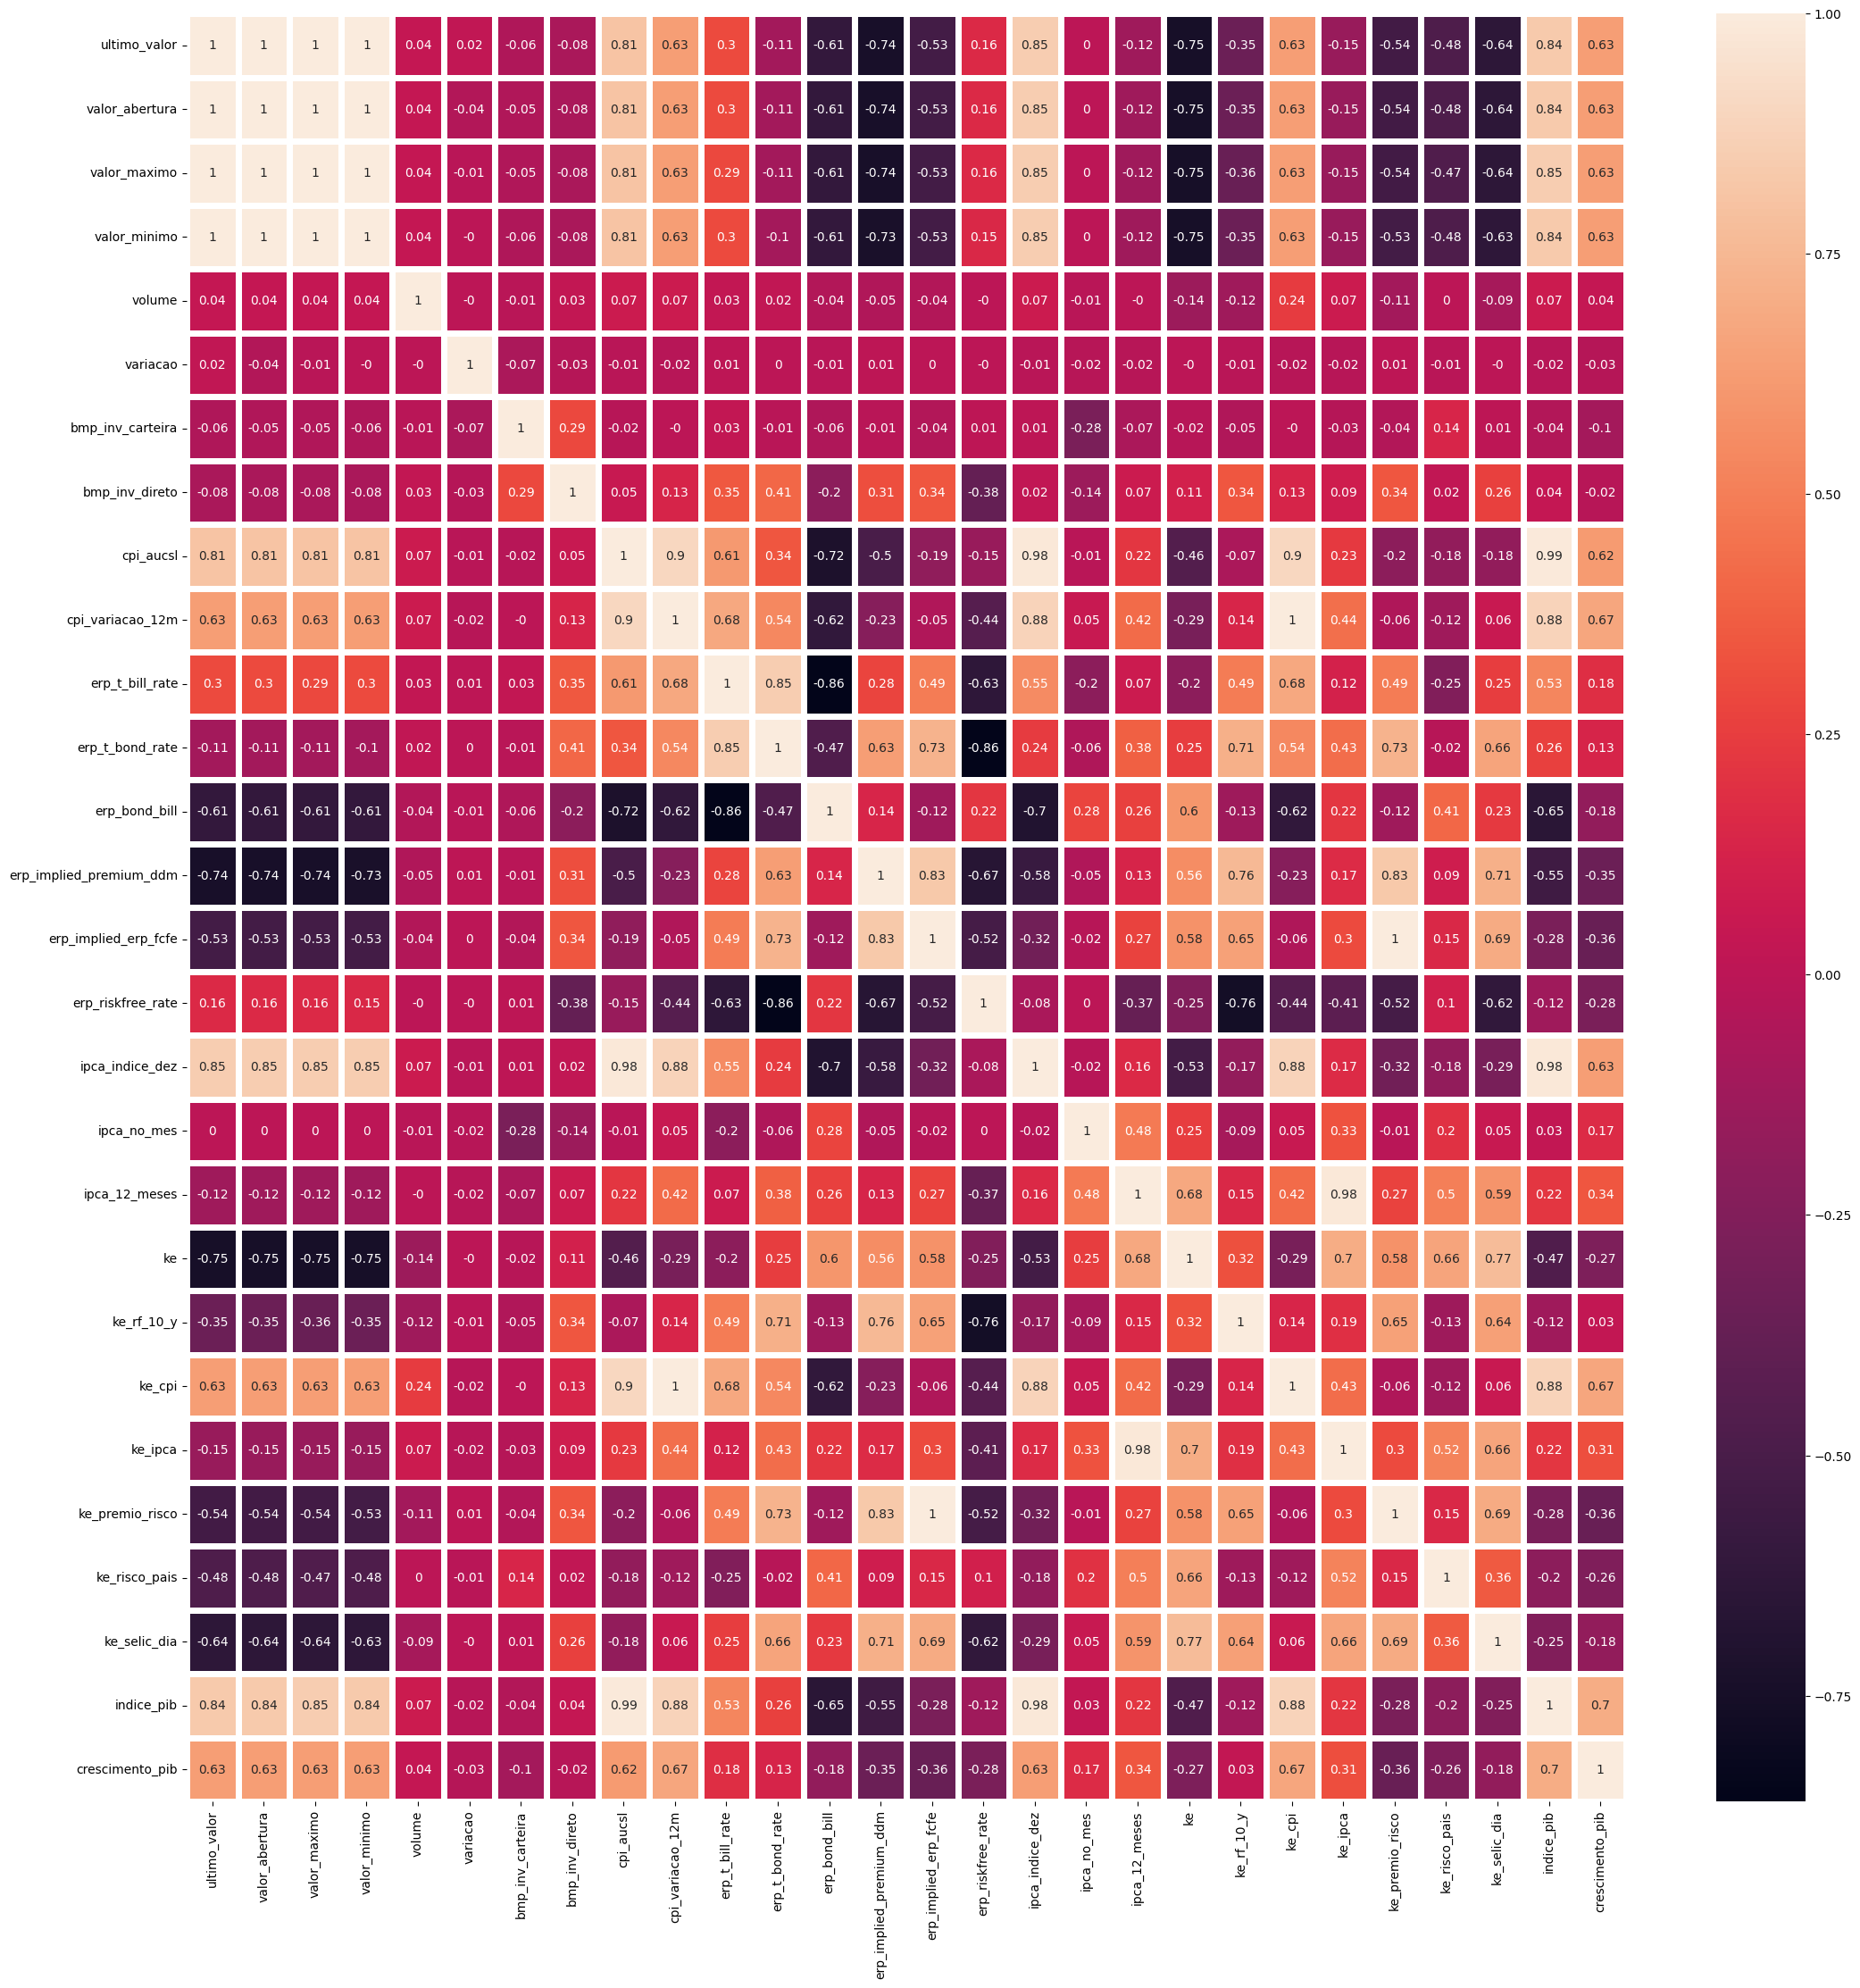

In [35]:
fig, ax = plt.subplots(figsize=(26,26))

sns.heatmap(data=correlation, annot=True, linewidths=5, ax=ax)

In [36]:
filtered_period.shape

(2063, 28)

<Axes: >

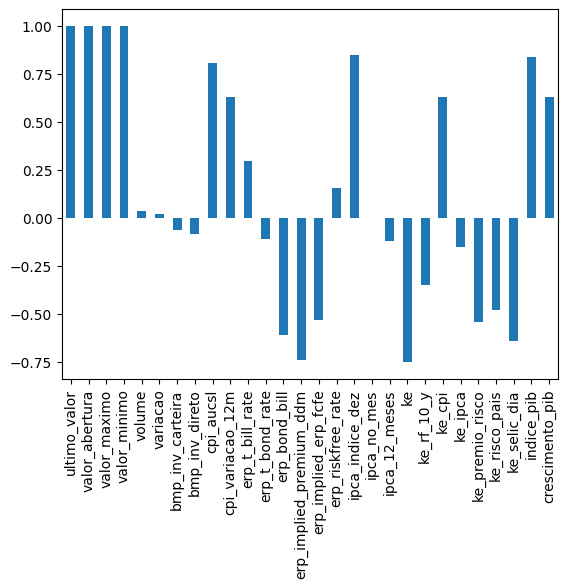

In [37]:
correlation['ultimo_valor'].plot(kind='bar')

In [38]:
correlation['ultimo_valor'].loc[lambda x: x > 0.3]

ultimo_valor        1.00
valor_abertura      1.00
valor_maximo        1.00
valor_minimo        1.00
cpi_aucsl           0.81
cpi_variacao_12m    0.63
ipca_indice_dez     0.85
ke_cpi              0.63
indice_pib          0.84
crescimento_pib     0.63
Name: ultimo_valor, dtype: float64

In [39]:
high_correlation_columns = correlation['ultimo_valor'].loc[lambda x: x > 0.3].index

high_correlation_columns

Index(['ultimo_valor', 'valor_abertura', 'valor_maximo', 'valor_minimo',
       'cpi_aucsl', 'cpi_variacao_12m', 'ipca_indice_dez', 'ke_cpi',
       'indice_pib', 'crescimento_pib'],
      dtype='object')

In [40]:
high_correlation_columns = ["ultimo_valor", "volume","bmp_inv_carteira", "bmp_inv_direto","ke","ke_ipca", "ke_cpi", "crescimento_pib"]

In [41]:
model_data = filtered_period[high_correlation_columns]
model_data.head()

,ultimo_valor,volume,bmp_inv_carteira,bmp_inv_direto,ke,ke_ipca,ke_cpi,crescimento_pib
data,,,,,,,,
2015-01-02,48.512,2.88,-11608.826885,4899.248508,0.184048,0.0641,-0.003396,0.050991
2015-01-05,47.517,3.87,-11608.826885,4899.248508,0.184787,0.0641,-0.003396,0.050991
2015-01-06,48.001,4.56,-11608.826885,4899.248508,0.184533,0.0641,-0.003396,0.050991
2015-01-07,49.463,4.41,-11608.826885,4899.248508,0.184233,0.0641,-0.003396,0.050991
2015-01-08,49.943,3.62,-11608.826885,4899.248508,0.184380,0.0641,-0.003396,0.050991


In [42]:
model_data.shape

(2063, 8)

In [43]:
model_data.reset_index(inplace=True)

In [44]:
model_data.drop(['data'], axis=1, inplace=True)

/tmp/ipykernel_261988/2717223396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.drop(['data'], axis=1, inplace=True)


In [45]:
model_data

,ultimo_valor,volume,bmp_inv_carteira,bmp_inv_direto,ke,ke_ipca,ke_cpi,crescimento_pib
0,48.512,2.88,-11608.826885,4899.248508,0.184048,0.0641,-0.003396,0.050991
1,47.517,3.87,-11608.826885,4899.248508,0.184787,0.0641,-0.003396,0.050991
2,48.001,4.56,-11608.826885,4899.248508,0.184533,0.0641,-0.003396,0.050991
3,49.463,4.41,-11608.826885,4899.248508,0.184233,0.0641,-0.003396,0.050991
4,49.943,3.62,-11608.826885,4899.248508,0.184380,0.0641,-0.003396,0.050991
...,...,...,...,...,...,...,...,...
2058,108.738,5.22,-363.235129,5978.324809,NaN,NaN,NaN,0.118880
2059,108.578,11.16,-363.235129,5978.324809,0.124581,0.0590,0.058001,0.118880
2060,110.237,11.19,-363.235129,5978.324809,0.124681,0.0590,0.058001,0.118880
2061,109.735,13.39,-363.235129,5978.324809,0.124680,0.0590,0.058001,0.118880


In [46]:
model_data.dropna(inplace=True)

/tmp/ipykernel_261988/3310783176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.dropna(inplace=True)


In [47]:
model_data.isnull().sum()

ultimo_valor        0
volume              0
bmp_inv_carteira    0
bmp_inv_direto      0
ke                  0
ke_ipca             0
ke_cpi              0
crescimento_pib     0
dtype: int64

In [48]:
high_correlation_columns[1:]

['volume',
 'bmp_inv_carteira',
 'bmp_inv_direto',
 'ke',
 'ke_ipca',
 'ke_cpi',
 'crescimento_pib']

In [49]:
x = model_data[high_correlation_columns[1:]]
y = model_data[['ultimo_valor']]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)

In [51]:
def show_results(y_test, y_pred):
  MAE = (mean_absolute_error(y_test, y_pred)).round(2)
  MDAPE = (np.median((np.abs(np.subtract(y_test, y_pred) / y_pred))) * 100).round(2)
  r2 = r2_score(y_test, y_pred).round(4)
  MSE = mean_squared_error(y_test, y_pred).round(2)

  print('Mean Square Error (MSE):', MSE)
  print('Mean Absolute Error (MAE):', MAE)
  print('MDAPE:', MDAPE)
  print('r²:', r2)

In [52]:
def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title('Curva de Aprendizado')
    plt.xlabel('Tamanho do Conjunto de Treinamento')
    plt.ylabel('Pontuação')
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='b')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='r')

    plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Treinamento')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label='Validação cruzada')
    plt.legend(loc='best')
    plt.show()

# Regressão com dados normalizados

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Ridge Model

In [54]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [55]:
ridge_y_pred_scaled = ridge_model.predict(X_test_scaled)

In [56]:
show_results(y_test, ridge_y_pred_scaled)

Mean Square Error (MSE): 103.39
Mean Absolute Error (MAE): 8.36
MDAPE: 9.23
r²: 0.8361


# Lasso model

In [57]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [58]:
lasso_y_pred_scaled = lasso_model.predict(X_test_scaled)

In [59]:
lasso_y_pred_scaled.shape

(576,)

In [60]:
lasso_y_pred_scaled = lasso_y_pred_scaled.reshape(576,1)

In [61]:
show_results(y_test, lasso_y_pred_scaled)

Mean Square Error (MSE): 103.69
Mean Absolute Error (MAE): 8.38
MDAPE: 9.23
r²: 0.8356


# Regressão Linear Simples

In [62]:
lr = LinearRegression()

In [63]:
lr.fit(x_train, y_train)

LinearRegression()

In [64]:
y_pred = lr.predict(x_test)

In [65]:
MAE = (mean_absolute_error(y_test, y_pred)).round(2)
MDAPE = (np.median((np.abs(np.subtract(y_test, y_pred) / y_pred))) * 100).round(2)
r2 = r2_score(y_test, y_pred).round(4)
MSE = mean_squared_error(y_test, y_pred).round(2)

In [66]:
print('Mean Square Error (MSE):', MSE)
print('Mean Absolute Error (MAE):', MAE)
print('MDAPE:', MDAPE)
print('r²:', r2)

Mean Square Error (MSE): 103.61
Mean Absolute Error (MAE): 8.37
MDAPE: 9.09
r²: 0.8357


# Regressão Linear com normalização

In [67]:
lr2 = LinearRegression()

In [68]:
lr2.fit(X_train_scaled, y_train)

LinearRegression()

In [69]:
y_pred_lr_scaled = lr2.predict(X_test_scaled)

In [70]:
show_results(y_test, y_pred_lr_scaled)

Mean Square Error (MSE): 103.61
Mean Absolute Error (MAE): 8.37
MDAPE: 9.09
r²: 0.8357


# Curvas de aprendizado

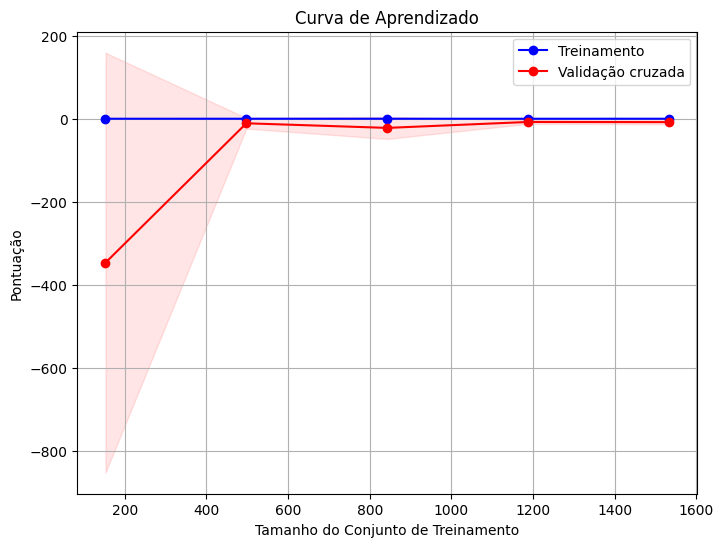

In [71]:
plot_learning_curve(lr, x, y, cv=5)

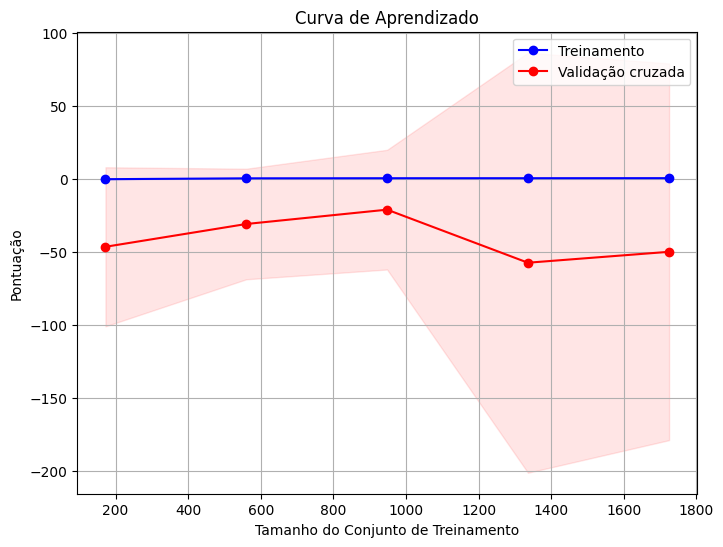

In [72]:
plot_learning_curve(lasso_model, x, y, cv=10)

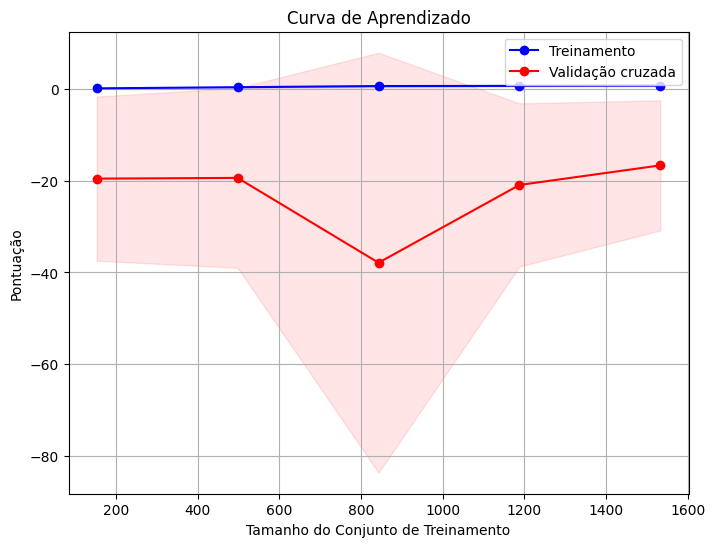

In [73]:
plot_learning_curve(ridge_model, x, y, cv=5)

# Ridge model sem normalização de dados de treino

In [74]:
ridge_model_2 = Ridge()

In [75]:
ridge_model_2.fit(x_train, y_train)

Ridge()

In [76]:
y_pred_ridge = ridge_model_2.predict(x_test)

In [77]:
show_results(y_test, y_pred_ridge)

Mean Square Error (MSE): 156.27
Mean Absolute Error (MAE): 11.11
MDAPE: 13.29
r²: 0.7522


# Lasso model sem normalização nos dados de treino

In [78]:
lasso_model_2 = Lasso(alpha=0.1, max_iter=10000)

In [79]:
lasso_model_2.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=10000)

In [80]:
y_pred_lasso = lasso_model_2.predict(x_test)

In [82]:
y_pred_lasso = y_pred_lasso.reshape(576,1)

In [83]:
show_results(y_test, y_pred_lasso)

Mean Square Error (MSE): 143.51
Mean Absolute Error (MAE): 10.12
MDAPE: 11.1
r²: 0.7725


<Axes: >

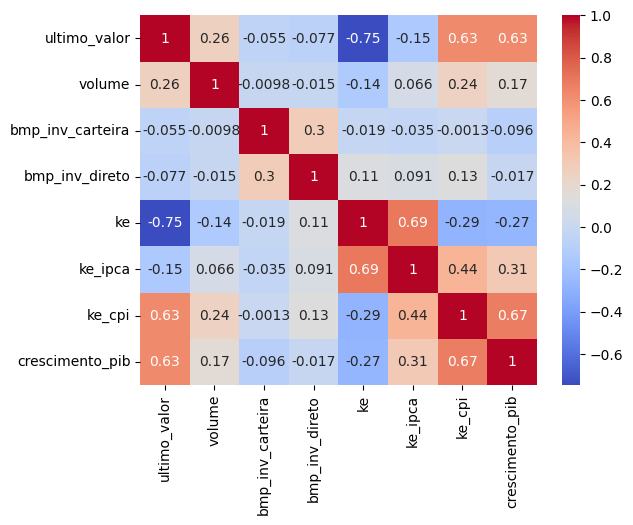

In [85]:
sns.heatmap(data=model_data.corr(), annot=True, cmap='coolwarm')